In [19]:
# In[1]: imports

import matplotlib.pyplot as plt
from collections import defaultdict


In [20]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f"{count}"
    return my_autopct

In [21]:
# In[2]: define studies and which state features they use
# (manually encoded to match your LaTeX table)

state_categories = [
    "Demographics",
    "Vitals",
    "Labs",
    "Ventilator settings",
    "Gas exchange / ABG",
    "Lung mechanics",
    "Sedation / agitation",
    "Severity / risk scores",
    "Disease / comorbidities",
    "NIV parameters",
    "Waveforms (pressure/flow/timing)",
    "Fluid / vasopressor / support",
    "Sepsis / other covariates",
    "Trajectory / history",
]

# map: study_id -> list of state categories used
# study_id just for reference; you don't need it in the figure.
states_by_study = {
    "prasad2017": [
        "Vitals",
        "Labs",
        "Sedation / agitation",
        "Ventilator settings",
        "Trajectory / history",
    ],
    "yu2019inverse": [
        "Demographics",
        "Vitals",
        "Labs",
        "Ventilator settings",
        "Sedation / agitation",
    ],
    "yu2020supervised": [
        "Demographics",
        "Vitals",
        "Labs",
        "Sedation / agitation",
        "Ventilator settings",
    ],
    "ruegsegger2021": [
        "Vitals",
        "Labs",
        "Ventilator settings",
    ],
    "peine2021": [
        "Ventilator settings",
        "Gas exchange / ABG",
        "Lung mechanics",
        "Vitals",
        "Labs",
    ],
    "feng2023": [
        "Disease / comorbidities",
        "Vitals",
        "Labs",
        "NIV parameters",
    ],
    "lee2023development": [
        "Vitals",  # HR, BP, SpO2
        "Waveforms (pressure/flow/timing)",  # airway pressure, flow
    ],
    "kondrup2023towards": [
        "Demographics",
        "Vitals",
        "Labs",
        "Disease / comorbidities",
        "Fluid / vasopressor / support",
    ],
    "liu2024reinforcement": [
        "Vitals",
        "Labs",
        "Ventilator settings",
        "Severity / risk scores",
    ],
    "li2024development": [
        "Gas exchange / ABG",
        "Lung mechanics",
        "Vitals",
        "Labs",
        "Ventilator settings",
    ],
    "lee2024methodology": [
        "Vitals",
        "Labs",
        "Ventilator settings",
        "Sepsis / other covariates",
    ],
    "den2024guideline": [
        "Severity / risk scores",
        "Ventilator settings",
        "Demographics",
        "Labs",
    ],
    "hao2025improving": [
        "Waveforms (pressure/flow/timing)",  # pressure, flow, timing
    ],
    "eghbali2025distribution": [
        "Demographics",
        "Vitals",
        "Labs",
        "Ventilator settings",
    ],
    "yousuf2025intellilung": [
        "Vitals",
        "Labs",
        "Ventilator settings",
        "Severity / risk scores",  # severity markers
    ],
    "xi2025k": [
        "Demographics",
        "Vitals",
        "Labs",
        "Ventilator settings",
    ],
    "lee2025matching": [
        "Vitals",
        "Labs",
        "Gas exchange / ABG",  # PaO2/FiO2
        "Ventilator settings",
    ],
}

# count how many studies use each state category
state_counts = defaultdict(int)
for study, feats in states_by_study.items():
    for cat in feats:
        state_counts[cat] += 1

# order counts according to state_categories list (so plot order is stable)
state_labels = []
state_values = []
for cat in state_categories:
    if state_counts[cat] > 0:
        state_labels.append(cat)
        state_values.append(state_counts[cat])

state_labels, state_values

(['Demographics',
  'Vitals',
  'Labs',
  'Ventilator settings',
  'Gas exchange / ABG',
  'Lung mechanics',
  'Sedation / agitation',
  'Severity / risk scores',
  'Disease / comorbidities',
  'NIV parameters',
  'Waveforms (pressure/flow/timing)',
  'Fluid / vasopressor / support',
  'Sepsis / other covariates',
  'Trajectory / history'],
 [6, 15, 15, 13, 3, 2, 3, 3, 2, 1, 2, 1, 1, 1])

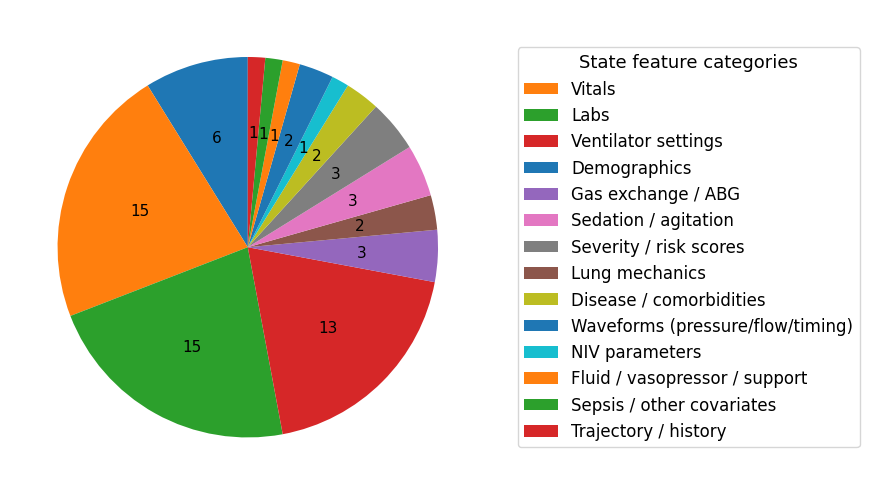

In [22]:
# --- In[3]: circle (pie) plot for state feature distribution
# no tiny labels on slices; use legend box with larger font ---

fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    state_values,
    labels=None,  # no labels directly on the circle
    autopct=make_autopct(state_values),
    startangle=90,
)

# make the count labels on wedges a bit clearer
plt.setp(autotexts, size=11)

# sort legend entries by count (descending)
order = sorted(range(len(state_values)), key=lambda i: state_values[i], reverse=True)
sorted_wedges = [wedges[i] for i in order]
sorted_labels = [state_labels[i] for i in order]

ax.legend(
    sorted_wedges,
    sorted_labels,
    title="State feature categories",
    loc="center left",
    bbox_to_anchor=(1.05, 0.5),
    fontsize=12,
    title_fontsize=13,
    frameon=True,
)

ax.set_aspect("equal")
plt.tight_layout()
plt.show()

In [23]:
# In[4]: define actions and which action types they use

action_categories = [
    "Sedation dosing / adjustment",
    "Ventilatory support up/down/maintain",
    "NIV support adjustment",
    "Vent setting combinations\n(Vt + PEEP + FiO₂)",
    "Vent parameter levels\n(Vt + PEEP + FiO₂ + RR)",
    "Pressure-control waveform params\n(PS / trigger / cycling)",
]

actions_by_study = {
    "prasad2017": [
        "Sedation dosing / adjustment",
        "Ventilatory support up/down/maintain",
    ],
    "yu2019inverse": [
        "Sedation dosing / adjustment",
        "Ventilatory support up/down/maintain",
    ],
    "yu2020supervised": [
        "Sedation dosing / adjustment",
        "Ventilatory support up/down/maintain",
    ],
    "ruegsegger2021": [
        "Ventilatory support up/down/maintain",
    ],
    "peine2021": [
        "Vent parameter levels\n(Vt + PEEP + FiO₂ + RR)",
    ],
    "feng2023": [
        "NIV support adjustment",
    ],
    "lee2023development": [
        "Ventilatory support up/down/maintain",
    ],
    "kondrup2023towards": [
        "Vent setting combinations\n(Vt + PEEP + FiO₂)",
    ],
    "liu2024reinforcement": [
        "Vent parameter levels\n(Vt + PEEP + FiO₂ + RR)",
    ],
    "li2024development": [
        "Vent setting combinations\n(Vt + PEEP + FiO₂)",
    ],
    "lee2024methodology": [
        "Vent setting combinations\n(Vt + PEEP + FiO₂)",
    ],
    "den2024guideline": [
        "Vent setting combinations\n(Vt + PEEP + FiO₂)",
    ],
    "hao2025improving": [
        "Pressure-control waveform params\n(PS / trigger / cycling)",
    ],
    "eghbali2025distribution": [
        "Vent setting combinations\n(Vt + PEEP + FiO₂)",
    ],
    "yousuf2025intellilung": [
        "Vent parameter levels\n(Vt + PEEP + FiO₂ + RR)",
    ],
    "xi2025k": [
        "Vent parameter levels\n(Vt + PEEP + FiO₂ + RR)",
    ],
    "lee2025matching": [
        "Vent setting combinations\n(Vt + PEEP + FiO₂)",
    ],
}

action_counts = defaultdict(int)
for study, acts in actions_by_study.items():
    for cat in acts:
        action_counts[cat] += 1

action_labels = []
action_values = []
for cat in action_categories:
    if action_counts[cat] > 0:
        action_labels.append(cat)
        action_values.append(action_counts[cat])


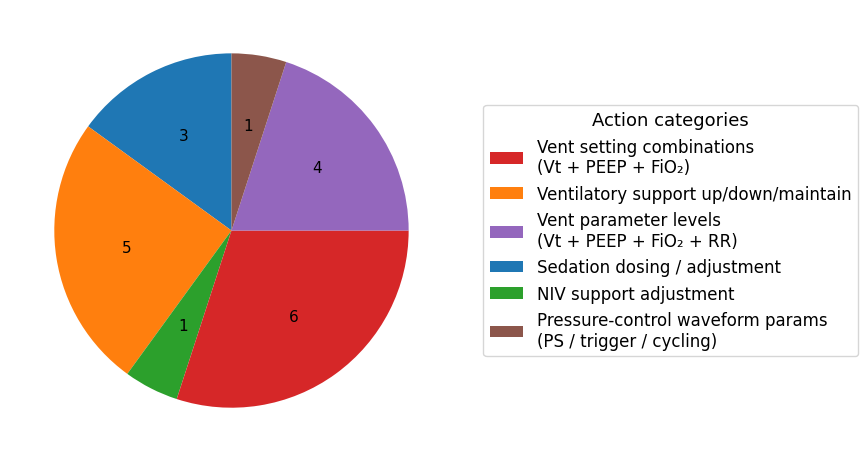

In [24]:
# --- In[5]: circle (pie) plot for action type distribution
# again: no labels on slices; legend box instead ---

fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    action_values,
    labels=None,  # no labels on wedges
    autopct=make_autopct(action_values),
    startangle=90,
)

plt.setp(autotexts, size=11)

# sort legend entries by count (descending)
order = sorted(range(len(action_values)), key=lambda i: action_values[i], reverse=True)
sorted_wedges  = [wedges[i] for i in order]
sorted_labels  = [action_labels[i] for i in order]

ax.legend(
    sorted_wedges,
    sorted_labels,
    title="Action categories",
    loc="center left",
    bbox_to_anchor=(1.05, 0.5),
    fontsize=12,
    title_fontsize=13,
    frameon=True,
)

ax.set_aspect("equal")
plt.tight_layout()
plt.show()

Total studies: 17


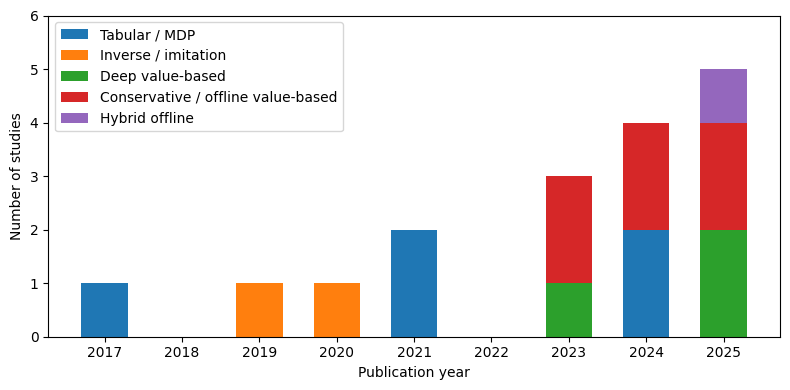

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# ---- 1. Data ----
# Years (including 2017/2018 and 2022 with zero)
years = np.array([2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025])

# Counts per category per year:
# 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025
tabular_mdp      = np.array([1, 0, 0, 0, 2, 0, 0, 2, 0])  # Prasad; Ruegsegger+Peine; Li+Den
inverse_imit     = np.array([0, 0, 1, 1, 0, 0, 0, 0, 0])  # Yu 2019, Yu 2020
deep_value       = np.array([0, 0, 0, 0, 0, 0, 1, 0, 2])  # Feng; Hao+Eghbali
conservative_off = np.array([0, 0, 0, 0, 0, 0, 2, 2, 2])  # Lee+Kondrup; Liu+Lee; Xi+Lee
hybrid_offline   = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1])  # Yousuf

# Sanity check (optional): total should be 17
print("Total studies:",
      tabular_mdp.sum()
    + inverse_imit.sum()
    + deep_value.sum()
    + conservative_off.sum()
    + hybrid_offline.sum())

# ---- 2. Stacked bar plot ----
width = 0.6

plt.figure(figsize=(8, 4))

b1 = tabular_mdp
b2 = b1 + inverse_imit
b3 = b2 + deep_value
b4 = b3 + conservative_off

plt.bar(years, tabular_mdp,      width, label='Tabular / MDP')
plt.bar(years, inverse_imit,     width, bottom=b1, label='Inverse / imitation')
plt.bar(years, deep_value,       width, bottom=b2, label='Deep value-based')
plt.bar(years, conservative_off, width, bottom=b3, label='Conservative / offline value-based')
plt.bar(years, hybrid_offline,   width, bottom=b4, label='Hybrid offline')

plt.xlabel('Publication year')
plt.ylabel('Number of studies')

plt.ylim(0, 5)          # up to max 5 (in 2025)
plt.yticks([0, 1, 2, 3, 4, 5, 6])

plt.xticks(years)       # show 2019–2025 including 2022

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


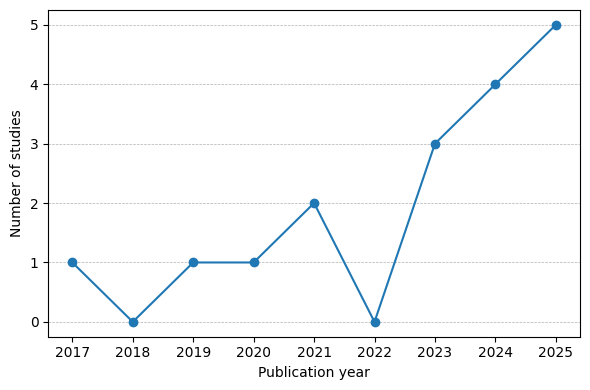

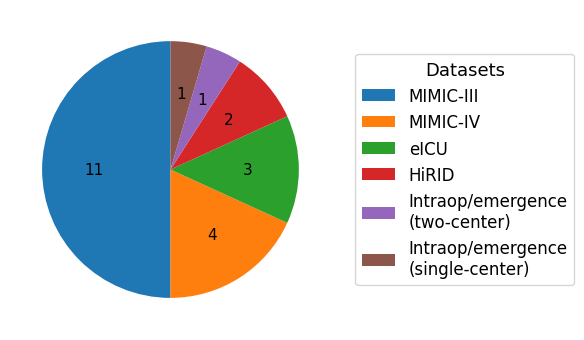

In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Make sure output folder exists
os.makedirs("figures", exist_ok=True)

# =========================
# 1) Line plot: papers per year
# =========================

years = np.array([2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025])
# Updated counts with Prasad in 2017 (still total n = 17)
n_papers = np.array([1, 0, 1, 1, 2, 0, 3, 4, 5])

plt.figure(figsize=(6, 4))
plt.plot(years, n_papers, marker="o")
plt.xticks(years)
plt.yticks(range(0, n_papers.max() + 1))
plt.xlabel("Publication year")
plt.ylabel("Number of studies")
# plt.title("New studies per year")
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.tight_layout()
# plt.savefig("figures/rl_mv_papers_per_year.png", dpi=300)
plt.show()

# =========================
# 2) Dataset-usage pie (circle) plot
# =========================
# Count how many studies use each dataset at least once
# =========================
# 2) Dataset-usage pie (circle) plot
# =========================
# Count how many studies use each dataset at least once
dataset_labels = [
    "MIMIC-III",
    "MIMIC-IV",
    "eICU",
    "HiRID",
    "Intraop/emergence\n(two-center)",
    "Intraop/emergence\n(single-center)",
]

dataset_counts = np.array([
    11,  # MIMIC-III
    4,   # MIMIC-IV
    3,   # eICU
    2,   # HiRID
    1,   # two-center intraop/emergence
    1,   # single-center intraop/emergence
])

# sort datasets by count (descending)
order = np.argsort(-dataset_counts)
dataset_counts = dataset_counts[order]
dataset_labels = [dataset_labels[i] for i in order]

# helper so labels show counts instead of %
def make_autopct(values):
    def my_autopct(pct):
        total = np.sum(values)
        count = int(round(pct * total / 100.0))
        return f"{count}"
    return my_autopct
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    dataset_counts,
    labels=None,  # no labels on wedges
    autopct=make_autopct(dataset_counts),
    startangle=90,
)

# make count labels a bit clearer
plt.setp(autotexts, size=11)

# legend box with colors + labels, already sorted (we sorted dataset_counts/labels above)
ax.legend(
    wedges,
    dataset_labels,
    title="Datasets",
    loc="center left",
    bbox_to_anchor=(1.05, 0.5),
    fontsize=12,
    title_fontsize=13,
    frameon=True,
)

ax.set_aspect("equal")
plt.tight_layout()
# plt.savefig("figures/rl_mv_dataset_usage_pie.png", dpi=300)
plt.show()
